In [1]:
!pip install sklearn_relief

In [24]:
pip install fuzzy-c-means --user

  Using cached fuzzy_c_means-1.6.3-py3-none-any.whl (9.1 kB)
  Using cached pydantic-1.10.2-cp38-cp38-win_amd64.whl (2.2 MB)
  Using cached numpy-1.24.0-cp38-cp38-win_amd64.whl (14.9 MB)
  Using cached tabulate-0.8.10-py3-none-any.whl (29 kB)
  Using cached typer-0.3.2-py3-none-any.whl (21 kB)
  Using cached typing_extensions-4.4.0-py3-none-any.whl (26 kB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.6.2 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.24.0 which is incompatible.


In [42]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px
import plotly.graph_objs as go
from sklearn.metrics import f1_score, recall_score, precision_score

In [2]:
df = pd.DataFrame(pd.read_excel('C:\\Users\\gaszk\\Documents\\KAR\\SKRIPSHIT\\data\\BIGFIVE.xlsx'))
df.to_csv('BIGFIVE.csv', index = None, header = True)

In [3]:
df

,Nama,Danceability,Energy,Speechiness,Acousticness,Instrumetalness,Liveness,Valence,Tempo,e,a,c,n,o,Angkatan
0,BIMA,0.564429,0.867000,0.065052,0.066338,0.003463,0.295398,0.606595,142.703738,28,31,29,33,30,18
1,GALIH,0.640451,0.748083,0.073577,0.147558,0.051822,0.189778,0.480346,127.574218,22,29,21,22,39,18
2,DIVA,0.593477,0.548761,0.050318,0.415290,0.030824,0.159370,0.514500,110.935409,13,25,19,21,20,18
3,NISPUR,0.582821,0.562268,0.053425,0.379153,0.005340,0.167027,0.418779,120.543518,35,39,20,30,29,18
4,SUNU,0.521280,0.647800,0.035584,0.241890,0.043464,0.138768,0.522560,124.434640,9,25,23,23,23,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,NURLIANA,0.572567,0.590767,0.057467,0.286244,0.000112,0.176493,0.431833,134.592000,15,23,24,17,23,21
197,Syahrul 21,0.573233,0.567933,0.053863,0.357294,0.008958,0.167013,0.399730,123.068967,9,29,25,23,28,21
198,Azzahra Ghina Lutfiani,0.494367,0.482267,0.033080,0.574472,0.036431,0.156077,0.340237,128.072900,5,26,24,10,25,21
199,Fatimah Az Zahra,0.643600,0.565450,0.072705,0.326633,0.000364,0.130260,0.466685,119.251550,14,23,26,21,29,21


In [4]:
df2 = df.drop('Nama',axis = 1)
df2['e'] = df.apply(lambda row: 1 if row['e'] > 20 else 0, axis=1)
df2['a'] = df.apply(lambda row: 1 if row['a'] > 20 else 0, axis=1)
df2['c'] = df.apply(lambda row: 1 if row['c'] > 20 else 0, axis=1)
df2['n'] = df.apply(lambda row: 1 if row['n'] > 20 else 0, axis=1)
df2['o'] = df.apply(lambda row: 1 if row['o'] > 20 else 0, axis=1)

In [5]:
df2

,Danceability,Energy,Speechiness,Acousticness,Instrumetalness,Liveness,Valence,Tempo,e,a,c,n,o,Angkatan
0,0.564429,0.867000,0.065052,0.066338,0.003463,0.295398,0.606595,142.703738,1,1,1,1,1,18
1,0.640451,0.748083,0.073577,0.147558,0.051822,0.189778,0.480346,127.574218,1,1,1,1,1,18
2,0.593477,0.548761,0.050318,0.415290,0.030824,0.159370,0.514500,110.935409,0,1,0,1,0,18
3,0.582821,0.562268,0.053425,0.379153,0.005340,0.167027,0.418779,120.543518,1,1,0,1,1,18
4,0.521280,0.647800,0.035584,0.241890,0.043464,0.138768,0.522560,124.434640,0,1,1,1,1,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.572567,0.590767,0.057467,0.286244,0.000112,0.176493,0.431833,134.592000,0,1,1,0,1,21
197,0.573233,0.567933,0.053863,0.357294,0.008958,0.167013,0.399730,123.068967,0,1,1,1,1,21
198,0.494367,0.482267,0.033080,0.574472,0.036431,0.156077,0.340237,128.072900,0,1,1,0,1,21
199,0.643600,0.565450,0.072705,0.326633,0.000364,0.130260,0.466685,119.251550,0,1,1,1,1,21


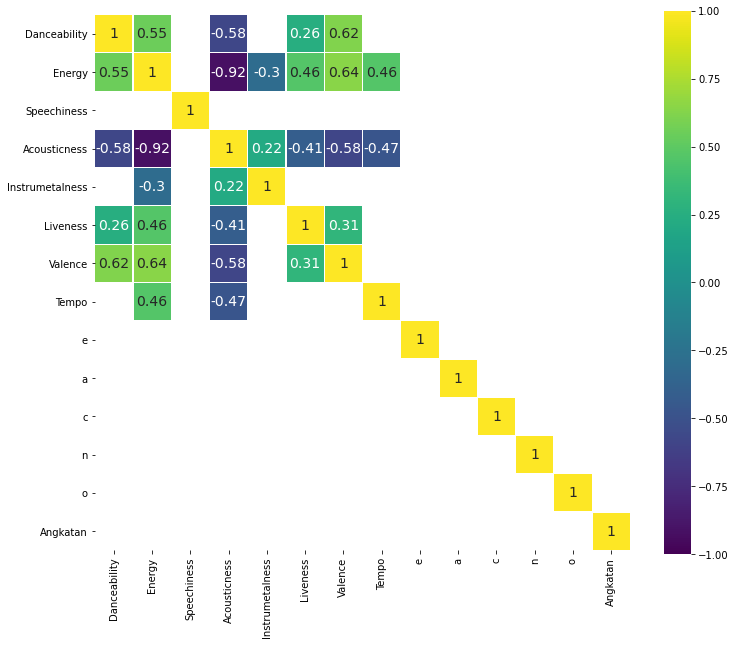

In [74]:
corr2 = df2.corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))
sns.heatmap(corr2[(corr2 >= 0.2) | (corr2 <= -0.2)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 14}, square=True);

In [7]:
df2

,Danceability,Energy,Speechiness,Acousticness,Instrumetalness,Liveness,Valence,Tempo,e,a,c,n,o,Angkatan
0,0.564429,0.867000,0.065052,0.066338,0.003463,0.295398,0.606595,142.703738,1,1,1,1,1,18
1,0.640451,0.748083,0.073577,0.147558,0.051822,0.189778,0.480346,127.574218,1,1,1,1,1,18
2,0.593477,0.548761,0.050318,0.415290,0.030824,0.159370,0.514500,110.935409,0,1,0,1,0,18
3,0.582821,0.562268,0.053425,0.379153,0.005340,0.167027,0.418779,120.543518,1,1,0,1,1,18
4,0.521280,0.647800,0.035584,0.241890,0.043464,0.138768,0.522560,124.434640,0,1,1,1,1,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.572567,0.590767,0.057467,0.286244,0.000112,0.176493,0.431833,134.592000,0,1,1,0,1,21
197,0.573233,0.567933,0.053863,0.357294,0.008958,0.167013,0.399730,123.068967,0,1,1,1,1,21
198,0.494367,0.482267,0.033080,0.574472,0.036431,0.156077,0.340237,128.072900,0,1,1,0,1,21
199,0.643600,0.565450,0.072705,0.326633,0.000364,0.130260,0.466685,119.251550,0,1,1,1,1,21


<AxesSubplot:xlabel='Angkatan,a'>

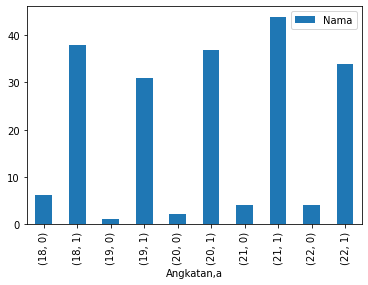

In [65]:
C = df2[['Nama', 'a', 'Angkatan']].groupby(by=['Angkatan', 'a']).count()
C.plot(kind='bar')

In [66]:
C = pd.DataFrame(data=C)
C.reset_index(inplace=True)
dt = C['Angkatan'].astype(str) + '_' + C['a'].astype(str)
dt = pd.DataFrame(data=dt)
C = [dt, C['Nama']]
C = pd.concat(C, axis = 1)
C = C.rename(columns = {0:'Angkatan','Nama':'Jumlah'})
C

,Angkatan,Jumlah
0,18_0,6
1,18_1,38
2,19_0,1
3,19_1,31
4,20_0,2
5,20_1,37
6,21_0,4
7,21_1,44
8,22_0,4
9,22_1,34


In [67]:
fig2 = px.bar(C, x='Angkatan', y='Jumlah', 
              color='Angkatan', text_auto=True, title = 'Agreeableness setiap angkatan', width=1200, height=600)

fig2.update_traces(
#    texttemplate='%{y}<br>%{text}',   # use '%{text}' to show only percentage
    textposition='outside'
)

fig2.show()

In [ ]:
sembilanbelas = df2[df2['Angkatan'].isin([22])].reset_index()
sembilanbelas[['a', 'Angkatan']].groupby(by=['a']).count()

In [23]:
df

,Nama,Danceability,Energy,Speechiness,Acousticness,Instrumetalness,Liveness,Valence,Tempo,e,a,c,n,o,Angkatan
0,BIMA,0.564429,0.867000,0.065052,0.066338,0.003463,0.295398,0.606595,142.703738,28,31,29,33,30,18
1,GALIH,0.640451,0.748083,0.073577,0.147558,0.051822,0.189778,0.480346,127.574218,22,29,21,22,39,18
2,DIVA,0.593477,0.548761,0.050318,0.415290,0.030824,0.159370,0.514500,110.935409,13,25,19,21,20,18
3,NISPUR,0.582821,0.562268,0.053425,0.379153,0.005340,0.167027,0.418779,120.543518,35,39,20,30,29,18
4,SUNU,0.521280,0.647800,0.035584,0.241890,0.043464,0.138768,0.522560,124.434640,9,25,23,23,23,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,NURLIANA,0.572567,0.590767,0.057467,0.286244,0.000112,0.176493,0.431833,134.592000,15,23,24,17,23,21
197,Syahrul 21,0.573233,0.567933,0.053863,0.357294,0.008958,0.167013,0.399730,123.068967,9,29,25,23,28,21
198,Azzahra Ghina Lutfiani,0.494367,0.482267,0.033080,0.574472,0.036431,0.156077,0.340237,128.072900,5,26,24,10,25,21
199,Fatimah Az Zahra,0.643600,0.565450,0.072705,0.326633,0.000364,0.130260,0.466685,119.251550,14,23,26,21,29,21


In [ ]:
duapuluh = df2[df2['Angkatan'].isin([22])].reset_index()
duapuluh[['c', 'Angkatan']].groupby(by=['c']).count()

In [ ]:
duasatu = df2[df2['Angkatan'].isin([22])].reset_index()
duasatu[['n', 'Angkatan']].groupby(by=['n']).count()

In [45]:
duadua = df2[df2['Angkatan'].isin([22])].reset_index()
duadua[['o', 'Angkatan']].groupby(by=['o']).count()

,Angkatan
o,
0,11
1,27


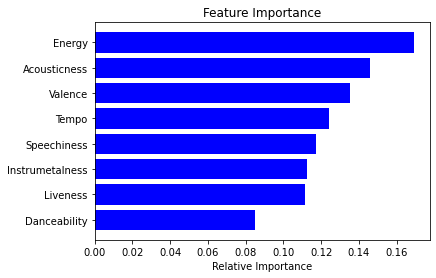

In [13]:
features = X.columns
importances = clf1.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [10]:
y1

0      1
1      1
2      0
3      1
4      1
      ..
196    1
197    1
198    1
199    1
200    1
Name: o, Length: 201, dtype: int64

# y1 = o

In [11]:
from sklearn.model_selection import train_test_split
X = df2.iloc[:, :-6]
y1 = df2.iloc[:, -2]
X_train, X_test, y1_train, y1_test = train_test_split(X, y1,
                                                   random_state=99)

from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier(criterion = 'gini',
                            max_depth = 8,
                            min_samples_split = 10,
                            random_state = 99)

clf1.fit(X_train, y1_train)

clf1.feature_importances_


array([0.08488634, 0.16894266, 0.11741266, 0.14568571, 0.11224051,
       0.1112215 , 0.13541214, 0.12419847])

In [12]:
y1_pred = clf1.predict(X_test)
y1_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

<AxesSubplot:>

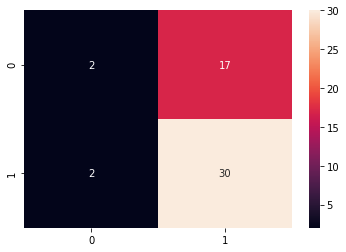

In [13]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y1_test, y1_pred)
sns.heatmap(cm1, annot=True)

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y1_test, y1_pred)

0.6274509803921569

In [22]:
f1 = f1_score(y1_test, y1_pred)
recall = recall_score(y1_test, y1_pred)
precision = precision_score(y1_test, y1_pred)

print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

F1 Score: 0.759493670886076
Recall: 0.9375
Precision: 0.6382978723404256


# y2= n

In [57]:
from sklearn.model_selection import train_test_split
X = df2.iloc[:, :-6]
y2 = df2.iloc[:, -3]
X_train, X_test, y2_train, y2_test = train_test_split(X, y2,
                                                   random_state=99)

from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(criterion = 'gini',
                            max_depth = 8,
                            min_samples_split = 10,
                            random_state = 99)

clf2.fit(X_train, y2_train)

clf2.feature_importances_

array([0.09652412, 0.15380057, 0.1155372 , 0.11099039, 0.17585354,
       0.12600002, 0.0946378 , 0.12665637])

In [58]:
y2_pred = clf2.predict(X_test)
y2_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

<AxesSubplot:>

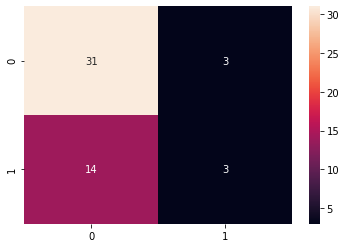

In [59]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y2_test, y2_pred)
sns.heatmap(cm2, annot=True)

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y2_test, y2_pred)

0.6666666666666666

# y3 =c

In [44]:
from sklearn.model_selection import train_test_split
X = df2.iloc[:, :-6]
y3 = df2.iloc[:, -4]
X_train, X_test, y3_train, y3_test = train_test_split(X, y3,
                                                   random_state=99)

from sklearn.ensemble import RandomForestClassifier
clf3 = RandomForestClassifier(criterion = 'gini',
                            max_depth = 8,
                            min_samples_split = 10,
                            random_state = 99)

clf3.fit(X_train, y3_train)

clf3.feature_importances_

array([0.11031611, 0.14015389, 0.12250089, 0.12717282, 0.10147751,
       0.14098332, 0.12753355, 0.12986191])

In [45]:
y3

0      1
1      1
2      0
3      0
4      1
      ..
196    1
197    1
198    1
199    1
200    0
Name: c, Length: 201, dtype: int64

In [46]:
y3_pred = clf3.predict(X_test)
y3_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1], dtype=int64)

<AxesSubplot:>

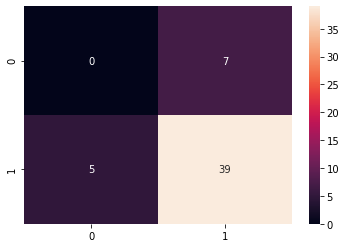

In [47]:
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y3_test, y3_pred)
sns.heatmap(cm3, annot=True)

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y3_test, y3_pred)

0.7647058823529411

# y4 = a

In [49]:
from sklearn.model_selection import train_test_split
X = df2.iloc[:, :-6]
y4 = df2.iloc[:, -5]
X_train, X_test, y4_train, y4_test = train_test_split(X, y4,
                                                   random_state=99)

from sklearn.ensemble import RandomForestClassifier
clf4 = RandomForestClassifier(criterion = 'gini',
                            max_depth = 8,
                            min_samples_split = 10,
                            random_state = 99)

clf4.fit(X_train, y4_train)

clf4.feature_importances_

array([0.12984282, 0.11774476, 0.11537893, 0.07499804, 0.14133444,
       0.09314031, 0.22648483, 0.10107589])

In [50]:
y4_pred = clf4.predict(X_test)
y4_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

<AxesSubplot:>

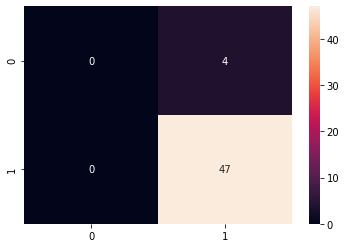

In [51]:
from sklearn.metrics import confusion_matrix
cm4 = confusion_matrix(y4_test, y4_pred)
sns.heatmap(cm4, annot=True)

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y4_test, y4_pred)

0.9215686274509803

# y5 = e

In [53]:
from sklearn.model_selection import train_test_split
X = df2.iloc[:, :-6]
y5 = df2.iloc[:, -6]
X_train, X_test, y5_train, y5_test = train_test_split(X, y5,
                                                   random_state=99)

from sklearn.ensemble import RandomForestClassifier
clf5 = RandomForestClassifier(criterion = 'gini',
                            max_depth = 8,
                            min_samples_split = 10,
                            random_state = 99)

clf5.fit(X_train, y5_train)

clf5.feature_importances_

array([0.09903708, 0.1479742 , 0.17460089, 0.08471981, 0.1532331 ,
       0.12596608, 0.11053146, 0.10393738])

In [54]:
y5_pred = clf5.predict(X_test)
y5_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0], dtype=int64)

<AxesSubplot:>

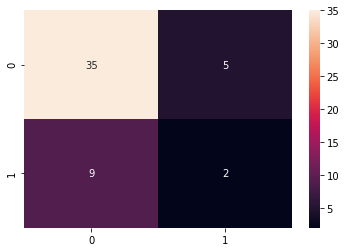

In [55]:
from sklearn.metrics import confusion_matrix
cm5 = confusion_matrix(y5_test, y5_pred)
sns.heatmap(cm5, annot=True)

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y5_test, y5_pred)

0.7254901960784313

In [ ]:
plot_confusion_matrix(cvF1, features_test, labels_test, display_labels=["Legitimate", "Spam"])

In [19]:
# Import library yang diperlukan

import pandas as pd
import numpy as np
from fcmeans import FCM

# Tentukan fitur yang akan digunakan untuk proses clustering
X = df[['Danceability','Energy','Speechiness','Acousticness','Instrumetalness','Liveness','Valence','Tempo']].values
fcm = FCM(n_clusters=10) # we use two cluster as an example
fcm.fit(X) ## X, numpy array. rows:samples columns:features


# Dapatkan cluster yang terkait dengan setiap titik data
clusters = fcm.predict(X)

# Dapatkan tingkat keanggotaan setiap titik data dalam setiap cluster


# Cetak hasil
print("Data:", X)
print("Cluster:", clusters)


Data: [[5.64429000e-01 8.67000000e-01 6.50520000e-02 ... 2.95398000e-01
  6.06595000e-01 1.42703738e+02]
 [6.40451000e-01 7.48083000e-01 7.35770000e-02 ... 1.89778000e-01
  4.80346000e-01 1.27574218e+02]
 [5.93477000e-01 5.48761000e-01 5.03180000e-02 ... 1.59370000e-01
  5.14500000e-01 1.10935409e+02]
 ...
 [4.94367000e-01 4.82267000e-01 3.30800000e-02 ... 1.56077000e-01
  3.40237000e-01 1.28072900e+02]
 [6.43600000e-01 5.65450000e-01 7.27050000e-02 ... 1.30260000e-01
  4.66685000e-01 1.19251550e+02]
 [5.22133000e-01 4.07067000e-01 3.37270000e-02 ... 1.14550000e-01
  3.94770000e-01 1.14192933e+02]]
Cluster: [6 0 2 8 7 8 4 1 7 3 0 4 8 6 0 5 9 8 3 8 7 7 4 8 3 7 8 3 7 9 7 8 3 7 3 8 4
 9 2 8 4 8 1 3 8 3 8 1 4 4 0 8 2 3 0 3 4 8 7 8 3 2 3 8 8 2 2 8 5 0 4 7 9 2
 4 1 1 4 4 3 9 3 4 0 2 4 2 4 2 9 8 4 8 6 8 7 7 7 3 9 2 4 9 8 1 7 3 0 2 3 8
 3 7 7 6 3 3 8 0 2 8 8 8 3 3 1 9 4 8 4 3 8 4 2 4 7 7 7 5 3 6 1 4 4 7 3 0 3
 7 7 0 2 8 8 2 3 4 2 4 4 4 3 4 1 9 3 2 8 0 3 5 7 4 8 5 4 7 8 8 3 2 1 9 4 4
 9 3 4 3 8

In [21]:
dt = pd.DataFrame(clusters, columns = ['cluster'])
gabung = [df, dt]
data = pd.concat(gabung, axis=1)

In [23]:
data[['cluster','Nama']].groupby(by=['cluster']).count()

,Nama
cluster,
0,15
1,12
2,19
3,34
4,34
5,5
6,5
7,26
8,39


In [26]:
klaster1 = data[data['cluster'].isin([0])].reset_index()
klaster1

,index,Nama,Danceability,Energy,Speechiness,Acousticness,Instrumetalness,Liveness,Valence,Tempo,e,a,c,n,o,cluster
0,1,GALIH,0.640451,0.748083,0.073577,0.147558,0.051822,0.189778,0.480346,127.574218,22,29,21,22,39,0
1,10,ARUM,0.451000,0.451000,0.033089,0.741444,0.086739,0.170800,0.271056,129.464444,14,24,14,27,21,0
2,14,AISYAH,0.631233,0.639200,0.101320,0.176449,0.000058,0.171027,0.415397,128.733233,18,27,20,12,26,0
3,50,AWALIA,0.570400,0.618000,0.042150,0.255151,0.019186,0.159437,0.472547,127.636500,9,28,20,4,31,0
4,54,NEILA,0.658500,0.705300,0.080190,0.171324,0.000004,0.163217,0.522733,129.790533,11,31,25,15,19,0
5,69,SITIMAGH,0.537792,0.506375,0.061975,0.436057,0.002492,0.159646,0.453375,131.722125,19,26,24,18,19,0
6,83,BESARS,0.595333,0.706167,0.065480,0.140625,0.000087,0.152807,0.372407,127.182333,6,8,38,40,38,0
7,107,RULY,0.607615,0.728862,0.048734,0.221783,0.010133,0.202415,0.613015,129.095092,18,23,18,21,20,0
8,118,Nurjanah 19,0.524800,0.505167,0.032330,0.459852,0.002297,0.187277,0.456900,127.514633,13,29,23,19,27,0
9,146,DWI WIN,0.483767,0.416967,0.033067,0.590807,0.000020,0.134683,0.344167,127.375367,25,30,30,25,25,0


In [27]:
klaster2 = data[data['cluster'].isin([1])].reset_index()
klaster2

,index,Nama,Danceability,Energy,Speechiness,Acousticness,Instrumetalness,Liveness,Valence,Tempo,e,a,c,n,o,cluster
0,7,NDEW,0.503300,0.321300,0.030500,0.535780,0.000000,0.156610,0.443000,136.657700,24,30,24,22,25,1
1,42,SAKINAH,0.541368,0.618158,0.057095,0.390063,0.000077,0.152895,0.465053,132.693737,7,23,23,20,12,1
2,47,MARWAH,0.529925,0.591325,0.039253,0.301151,0.001503,0.173675,0.392920,134.060475,20,28,29,17,25,1
3,75,TSABITAS,0.598933,0.727533,0.727533,0.090505,0.000510,0.138643,0.504900,132.100733,2,25,26,10,22,1
4,76,AHMAD F,0.607867,0.824467,0.051747,0.105189,0.007698,0.185267,0.687800,138.883967,7,29,28,25,27,1
5,104,FIDA19,0.638467,0.717133,0.071410,0.092080,0.000000,0.126013,0.545500,132.383300,19,26,25,22,24,1
6,125,Ikrom Al Furqon,0.562633,0.835400,0.063123,0.064275,0.009406,0.230673,0.582400,132.615700,18,24,15,16,18,1
7,141,FATHNIN,0.571033,0.645033,0.066777,0.167028,0.002567,0.213677,0.446763,135.241067,11,26,33,22,25,1
8,163,Ryan,0.471000,0.830500,0.063640,0.061511,0.031528,0.217803,0.533067,136.466800,30,32,23,17,25,1
9,181,DINASEKAR,0.589967,0.658200,0.045203,0.160394,0.002010,0.002010,0.513880,134.549167,11,32,24,23,23,1


In [28]:
klaster3 = data[data['cluster'].isin([2])].reset_index()
klaster3

,index,Nama,Danceability,Energy,Speechiness,Acousticness,Instrumetalness,Liveness,Valence,Tempo,e,a,c,n,o,cluster
0,2,DIVA,0.593477,0.548761,0.050318,0.415290,0.030824,0.159370,0.514500,110.935409,13,25,19,21,20,2
1,38,ATIKAH,0.554767,0.567800,0.035307,0.404313,0.003649,0.134423,0.573067,111.753933,2,9,22,19,34,2
2,52,ADINDANABILA,0.507000,0.507000,0.059058,0.629750,0.001091,0.147675,0.320250,110.770167,10,17,18,5,22,2
3,61,USWATUN,0.452833,0.421433,0.039233,0.730167,0.000290,0.131933,0.308457,111.476500,20,27,33,17,18,2
4,65,NADIRA,0.467800,0.503167,0.037007,0.419894,0.026707,0.153365,0.311360,108.789275,16,27,29,24,28,2
5,66,SALWADIVA,0.506933,0.498600,0.064940,0.578347,0.000262,0.140823,0.389823,109.772167,11,26,25,11,21,2
6,73,LEILAF,0.624133,0.518133,0.060420,0.416078,0.003153,0.122267,0.423530,111.332167,20,27,32,19,19,2
7,84,AURELD,0.608467,0.515400,0.065767,0.486137,0.003007,0.170707,0.533833,109.531000,17,30,23,24,22,2
8,86,NAURAHN,0.546767,0.466800,0.054993,0.524670,0.001895,0.166770,0.396967,111.203133,20,29,25,15,20,2
9,88,ALIFALAM,0.569833,0.459533,0.057197,0.503053,0.003166,0.121587,0.367203,108.465000,12,20,20,15,21,2


In [29]:
klaster4 = data[data['cluster'].isin([3])].reset_index()
klaster4

,index,Nama,Danceability,Energy,Speechiness,Acousticness,Instrumetalness,Liveness,Valence,Tempo,e,a,c,n,o,cluster
0,9,NABILA S,0.558182,0.395727,0.085955,0.587127,0.587127,0.151336,0.411455,114.700364,12,19,29,23,20,3
1,18,DEWI,0.598880,0.393518,0.064835,0.552205,0.034259,0.149901,0.401275,114.697200,11,17,23,23,22,3
2,24,EKA,0.707200,0.621567,0.076607,0.280507,0.002898,0.141920,0.593087,112.938100,13,25,20,16,17,3
3,27,NABELA,0.689333,0.394083,0.078723,0.503453,0.004875,0.145750,0.364863,115.663700,14,23,30,14,21,3
4,32,SYIFANADA,0.639000,0.297000,0.033400,0.938000,0.083900,0.180000,0.292000,113.989000,14,22,29,13,23,3
5,34,ZULFA,0.622205,0.496179,0.081208,0.378531,0.052409,0.187303,0.480744,115.617282,13,35,26,7,21,3
6,43,MARGITA,0.619080,0.558309,0.050982,0.457143,0.007317,0.148609,0.498622,113.403391,19,37,33,3,23,3
7,45,BAHARUDDIN,0.377231,0.083243,0.044567,0.955923,0.808227,0.125571,0.406640,112.329295,19,34,31,21,28,3
8,53,KIARA,0.554600,0.418400,0.056583,0.664173,0.003265,0.124597,0.411123,113.243967,21,25,22,4,22,3
9,55,FALIZA,0.475345,0.326924,0.037472,0.831103,0.045501,0.144931,0.292214,112.222241,23,25,20,23,23,3


In [30]:
klaster5 = data[data['cluster'].isin([4])].reset_index()
klaster5

,index,Nama,Danceability,Energy,Speechiness,Acousticness,Instrumetalness,Liveness,Valence,Tempo,e,a,c,n,o,cluster
0,6,SHEILA,0.698051,0.764186,0.076424,0.174160,0.000003,0.159441,0.608949,116.098458,26,27,21,14,21,4
1,11,ABI,0.554785,0.664646,0.063163,0.328978,0.000081,0.163677,0.450937,116.699316,9,28,27,24,19,4
2,22,GIBRAN,0.547933,0.547933,0.044287,0.450244,0.009076,0.171007,0.525837,117.369400,32,8,17,38,26,4
3,36,ANIS,0.638538,0.410154,0.101423,0.387423,0.387423,0.158954,0.223531,117.490308,11,25,24,19,23,4
4,40,ASMI,0.704167,0.755933,0.084620,0.123881,0.000006,0.151547,0.551867,117.728733,4,23,23,15,26,4
5,48,DEVANO,0.563825,0.493968,0.052525,0.405434,0.003310,0.124113,0.360147,116.800650,16,22,18,12,24,4
6,49,TAMARA22,0.574067,0.526333,0.042283,0.496888,0.025902,0.164493,0.455300,116.176733,17,30,21,15,21,4
7,56,NIKEN,0.539147,0.428735,0.048053,0.048053,0.003051,0.156226,0.331485,116.909147,16,23,28,12,21,4
8,70,ALIVIAH,0.527433,0.496133,0.037827,0.539655,0.023838,0.161247,0.392500,117.030200,9,23,21,12,21,4
9,74,AWAL,0.605862,0.660759,0.069714,0.212386,0.044207,0.201679,0.550648,116.587276,4,9,21,28,29,4


In [31]:
klaster6 = data[data['cluster'].isin([5])].reset_index()
klaster6

,index,Nama,Danceability,Energy,Speechiness,Acousticness,Instrumetalness,Liveness,Valence,Tempo,e,a,c,n,o,cluster
0,15,ALMAINA,0.545200,0.314320,0.038400,0.823100,0.003546,0.154490,0.459300,87.24580,19,23,20,19,21,5
1,68,NAYLAS,0.516500,0.317960,0.036807,0.820133,0.012858,0.136293,0.426670,100.86820,15,33,17,9,17,5
2,138,KEVIN,0.403000,0.388000,0.035050,0.649500,0.000120,0.109300,0.130500,98.78200,14,28,25,19,27,5
3,170,SYILALKAD,0.562800,0.386900,0.036300,0.757700,0.008999,0.109860,0.547300,100.13310,13,28,30,12,20,5
4,174,KHOIRUNNISA,0.495567,0.428267,0.034700,0.706267,0.003484,0.153227,0.410523,99.84033,13,30,26,14,26,5


In [32]:
klaster7 = data[data['cluster'].isin([6])].reset_index()
klaster7

,index,Nama,Danceability,Energy,Speechiness,Acousticness,Instrumetalness,Liveness,Valence,Tempo,e,a,c,n,o,cluster
0,0,BIMA,0.564429,0.867000,0.065052,0.066338,0.003463,0.295398,0.606595,142.703738,28,31,29,33,30,6
1,13,AGUM,0.556133,0.594533,0.037087,0.287806,0.002458,0.213817,0.460690,142.081733,20,33,22,10,26,6
2,93,Sharfinna 19,0.459000,0.377000,0.031400,0.652000,0.000000,0.094700,0.433000,169.896000,10,29,28,9,22,6
3,114,Anggita 19,0.582500,0.633533,0.068987,0.222327,0.000074,0.156163,0.510900,143.682833,14,25,25,22,17,6
4,140,TABINA,0.612048,0.654429,0.075257,0.254393,0.000200,0.165890,0.437048,141.007381,16,22,22,9,13,6


In [33]:
klaster8 = data[data['cluster'].isin([7])].reset_index()
klaster8

,index,Nama,Danceability,Energy,Speechiness,Acousticness,Instrumetalness,Liveness,Valence,Tempo,e,a,c,n,o,cluster
0,4,SUNU,0.521280,0.647800,0.035584,0.241890,0.043464,0.138768,0.522560,124.434640,9,25,23,23,23,7
1,8,RENALDY,0.531438,0.701397,0.039055,0.142622,0.017800,0.152759,0.518470,125.224164,19,26,30,22,25,7
2,20,DINAZH,0.696933,0.760133,0.075843,0.151063,0.000078,0.205467,0.599700,125.181067,10,29,17,7,17,7
3,21,DYAH,0.589352,0.589352,0.048594,0.263901,0.000985,0.173372,0.506594,125.118074,19,30,32,19,26,7
4,25,KHATYA,0.552370,0.516037,0.065781,0.451075,0.033594,0.167433,0.380667,122.841000,9,28,32,21,29,7
5,28,MALINA,0.596550,0.587740,0.050543,0.365582,0.000064,0.185188,0.527100,123.758310,13,31,18,10,26,7
6,30,JANGKUNG,0.553100,0.570667,0.037120,0.451737,0.032433,0.189840,0.386157,123.445000,21,25,18,20,22,7
7,33,YUSMAR,0.598933,0.612867,0.083960,0.211948,0.040498,0.187650,0.385700,125.661300,8,23,22,9,18,7
8,58,AKHDAN,0.691767,0.557667,0.105017,0.448950,0.000319,0.149197,0.534300,124.876767,33,39,29,33,28,7
9,71,ALFIYYAH,0.652933,0.588600,0.086750,0.340599,0.003081,0.176380,0.518167,123.907600,17,31,32,20,22,7


In [34]:
klaster9 = data[data['cluster'].isin([8])].reset_index()
klaster9

,index,Nama,Danceability,Energy,Speechiness,Acousticness,Instrumetalness,Liveness,Valence,Tempo,e,a,c,n,o,cluster
0,3,NISPUR,0.582821,0.562268,0.053425,0.379153,0.005340,0.167027,0.418779,120.543518,35,39,20,30,29,8
1,5,GUSHINTA,0.479194,0.435694,0.086022,0.528306,0.000304,0.187475,0.417942,120.884889,13,21,20,15,24,8
2,12,ADENIA18,0.483867,0.483867,0.031717,0.617803,0.000039,0.148543,0.347970,120.561567,17,26,31,15,19,8
3,17,DHITYA,0.606708,0.539344,0.045934,0.523756,0.001255,0.165128,0.515365,119.950125,16,26,29,14,21,8
4,19,AYDA,0.581667,0.429233,0.075390,0.519360,0.003058,0.143823,0.363793,119.488700,20,28,27,12,21,8
5,23,ELISDA,0.615278,0.709963,0.071219,0.167727,0.004005,0.166167,0.421759,118.830519,9,21,27,13,20,8
6,26,NADANUR,0.551200,0.446333,0.045743,0.647667,0.000670,0.153157,0.455267,119.056533,17,30,21,9,23,8
7,31,TEMI,0.654920,0.621880,0.080185,0.238523,0.000178,0.156705,0.541019,119.530107,25,25,23,8,17,8
8,35,FARINA,0.712250,0.787350,0.081449,0.081714,0.001929,0.192202,0.592018,120.932410,12,26,20,14,21,8
9,39,INTAN,0.712000,0.746333,0.059527,0.115330,0.000002,0.164160,0.623800,120.700967,18,20,15,6,15,8


In [35]:
klaster10 = data[data['cluster'].isin([9])].reset_index()
klaster10

,index,Nama,Danceability,Energy,Speechiness,Acousticness,Instrumetalness,Liveness,Valence,Tempo,e,a,c,n,o,cluster
0,16,AMEL,0.576033,0.411273,0.036607,0.693200,0.004255,0.144340,0.522767,107.259367,16,30,35,22,20,9
1,29,NADIYAH,0.583900,0.569533,0.039950,0.443049,0.027461,0.153963,0.562833,108.236100,14,25,29,12,24,9
2,37,LATIFAH,0.600033,0.369967,0.079077,0.662773,0.234329,0.160103,0.261933,106.241667,21,18,34,21,29,9
3,72,ARWAN,0.511000,0.538667,0.045500,0.427333,0.000000,0.268200,0.428000,104.745667,18,24,28,28,20,9
4,80,BULANN,0.499567,0.356700,0.035253,0.809400,0.038617,0.128870,0.401570,107.283100,16,25,24,21,23,9
5,89,KHOIRUNNISAFI,0.713600,0.608900,0.057440,0.308300,0.000065,0.172810,0.566000,105.693000,24,30,33,24,24,9
6,99,Indah 19,0.577133,0.342067,0.035413,0.814333,0.004719,0.134913,0.449900,106.104700,12,28,19,21,21,9
7,102,ELVI 19,0.530900,0.426767,0.036190,0.682177,0.001752,0.182953,0.410667,106.884133,13,33,20,5,16,9
8,126,Vina,0.604533,0.426233,0.049117,0.659233,0.010113,0.145690,0.478600,104.724367,25,33,24,10,30,9
9,164,Poppy Dalama Zain,0.512690,0.385931,0.034997,0.726000,0.003109,0.135324,0.389417,107.045345,21,29,30,27,24,9


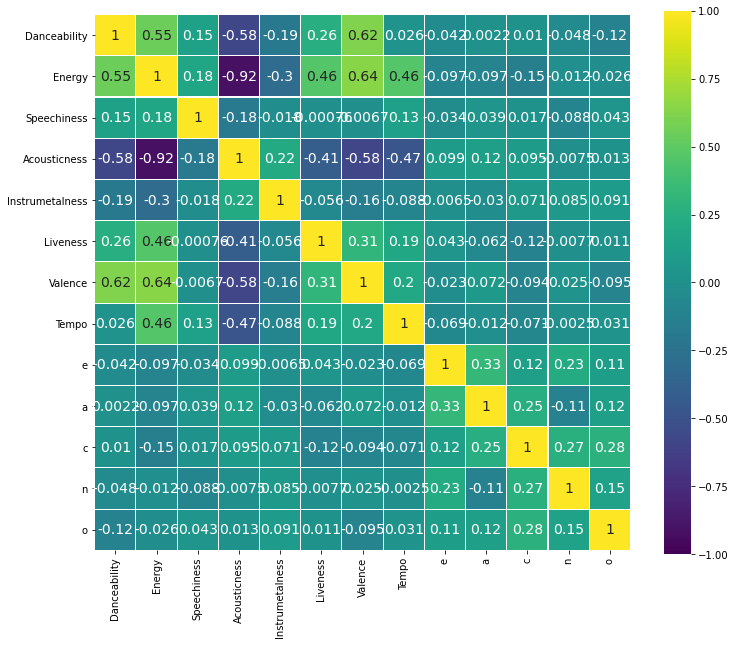

In [6]:
df4 = df[['Danceability','Energy','Speechiness','Acousticness','Instrumetalness','Liveness','Valence','Tempo','e','a','c','n','o']]
df4.corr()
corr2 = df4.corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,annot=True, annot_kws={"size": 14}, square=True);

In [13]:
clusters

array([1, 5, 0, 2, 9, 2, 7, 3, 9, 6, 5, 7, 2, 1, 5, 8, 4, 2, 6, 2, 9, 9,
       7, 2, 6, 9, 2, 6, 9, 4, 9, 2, 6, 9, 6, 2, 7, 4, 0, 2, 7, 2, 3, 6,
       2, 6, 2, 3, 7, 7, 5, 2, 0, 6, 5, 6, 7, 2, 9, 2, 6, 0, 6, 2, 2, 0,
       0, 2, 8, 5, 7, 9, 4, 0, 7, 3, 3, 7, 7, 6, 4, 6, 7, 5, 0, 7, 0, 7,
       0, 4, 2, 7, 2, 1, 2, 9, 9, 9, 6, 4, 0, 7, 4, 2, 3, 9, 6, 5, 0, 6,
       2, 6, 9, 9, 1, 6, 6, 2, 5, 0, 2, 2, 2, 6, 6, 3, 4, 7, 2, 7, 6, 2,
       7, 0, 7, 9, 9, 9, 8, 6, 1, 3, 7, 7, 9, 6, 5, 6, 9, 9, 5, 0, 2, 2,
       0, 6, 7, 0, 7, 7, 7, 6, 7, 3, 4, 6, 0, 2, 5, 6, 8, 9, 7, 2, 8, 7,
       9, 2, 2, 6, 0, 3, 4, 7, 7, 4, 6, 7, 6, 2, 2, 5, 7, 3, 9, 5, 3, 9,
       5, 2, 6], dtype=int64)

In [19]:
df4

,Danceability,Energy,Speechiness,Acousticness,Instrumetalness,Liveness,Valence,Tempo,e,a,c,n,o
0,0.564429,0.867000,0.065052,0.066338,0.003463,0.295398,0.606595,142.703738,28,31,29,33,30
1,0.640451,0.748083,0.073577,0.147558,0.051822,0.189778,0.480346,127.574218,22,29,21,22,39
2,0.593477,0.548761,0.050318,0.415290,0.030824,0.159370,0.514500,110.935409,13,25,19,21,20
3,0.582821,0.562268,0.053425,0.379153,0.005340,0.167027,0.418779,120.543518,35,39,20,30,29
4,0.521280,0.647800,0.035584,0.241890,0.043464,0.138768,0.522560,124.434640,9,25,23,23,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.572567,0.590767,0.057467,0.286244,0.000112,0.176493,0.431833,134.592000,15,23,24,17,23
197,0.573233,0.567933,0.053863,0.357294,0.008958,0.167013,0.399730,123.068967,9,29,25,23,28
198,0.494367,0.482267,0.033080,0.574472,0.036431,0.156077,0.340237,128.072900,5,26,24,10,25
199,0.643600,0.565450,0.072705,0.326633,0.000364,0.130260,0.466685,119.251550,14,23,26,21,29


In [24]:
from sklearn import preprocessing
df4_norm = preprocessing.normalize(df4, axis=0)
columns = df4.columns
scaled_df = pd.DataFrame(df4_norm, columns=columns)
scaled_df.head()


,Danceability,Energy,Speechiness,Acousticness,Instrumetalness,Liveness,Valence,Tempo,e,a,c,n,o
0,0.068710,0.110179,0.047973,0.009824,0.003001,0.128400,0.094334,0.084295,0.112658,0.080482,0.080154,0.126723,0.090545
1,0.077965,0.095067,0.054259,0.021853,0.044901,0.082490,0.074701,0.075358,0.088517,0.075290,0.058043,0.084482,0.117709
2,0.072246,0.069737,0.037107,0.061503,0.026707,0.069273,0.080012,0.065530,0.052306,0.064905,0.052515,0.080642,0.060363
3,0.070949,0.071453,0.039398,0.056151,0.004627,0.072601,0.065126,0.071205,0.140823,0.101252,0.055279,0.115202,0.087527
4,0.063458,0.082323,0.026241,0.035823,0.037659,0.060318,0.081265,0.073504,0.036212,0.064905,0.063571,0.088322,0.069418


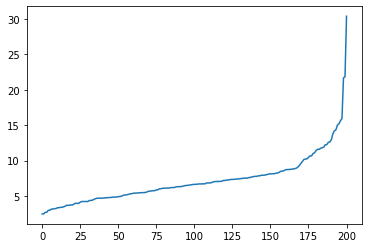

In [26]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

neighbors = NearestNeighbors(n_neighbors=26)
neighbors_fit = neighbors.fit(df4)
distances, indices = neighbors_fit.kneighbors(df4)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

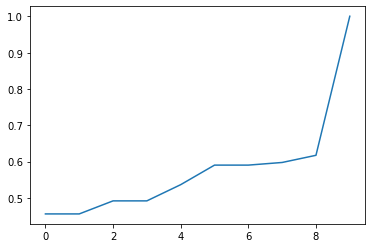

In [34]:
nn_model = NearestNeighbors(n_neighbors=2)
nn_model.fit(X)
distances, indices = nn_model.kneighbors(X)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [43]:
from sklearn.cluster import DBSCAN
X = scaled_df['Danceability','Energy','Speechiness','Acousticness','Instrumetalness','Liveness','Valence','Tempo']
y = scaled_df['e']
db = DBSCAN(eps=1.0, min_samples=26)
db.fit(X)

y_pred = db.fit_predict(X)
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
plt.title("Clusters determined by DBSCAN")

KeyError: ('Danceability', 'Energy', 'Speechiness', 'Acousticness', 'Instrumetalness', 'Liveness', 'Valence', 'Tempo')

In [44]:
scaled_df

,Danceability,Energy,Speechiness,Acousticness,Instrumetalness,Liveness,Valence,Tempo,e,a,c,n,o
0,0.068710,0.110179,0.047973,0.009824,0.003001,0.128400,0.094334,0.084295,0.112658,0.080482,0.080154,0.126723,0.090545
1,0.077965,0.095067,0.054259,0.021853,0.044901,0.082490,0.074701,0.075358,0.088517,0.075290,0.058043,0.084482,0.117709
2,0.072246,0.069737,0.037107,0.061503,0.026707,0.069273,0.080012,0.065530,0.052306,0.064905,0.052515,0.080642,0.060363
3,0.070949,0.071453,0.039398,0.056151,0.004627,0.072601,0.065126,0.071205,0.140823,0.101252,0.055279,0.115202,0.087527
4,0.063458,0.082323,0.026241,0.035823,0.037659,0.060318,0.081265,0.073504,0.036212,0.064905,0.063571,0.088322,0.069418
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.069701,0.075075,0.042379,0.042392,0.000097,0.076716,0.067156,0.079504,0.060353,0.059713,0.066335,0.065281,0.069418
197,0.069782,0.072173,0.039721,0.052914,0.007762,0.072595,0.062164,0.072697,0.036212,0.075290,0.069098,0.088322,0.084509
198,0.060181,0.061287,0.024395,0.085078,0.031566,0.067842,0.052912,0.075653,0.020118,0.067501,0.066335,0.038401,0.075454
199,0.078348,0.071858,0.053616,0.048373,0.000315,0.056620,0.072576,0.070442,0.056329,0.059713,0.071862,0.080642,0.087527
